In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from matplotlib.pyplot import *
import seaborn
from pandas import *
import json

In [2]:
with open('../datasets/locations/test.json') as data_file:    
    json_data = json.load(data_file)

In [3]:
json_data['locations'][0]

{u'accuracy': 23,
 u'altitude': 61,
 u'latitudeE7': 598953653,
 u'longitudeE7': 106285510,
 u'timestampMs': u'1498809921152'}

In [4]:
df = DataFrame(json_data['locations'])

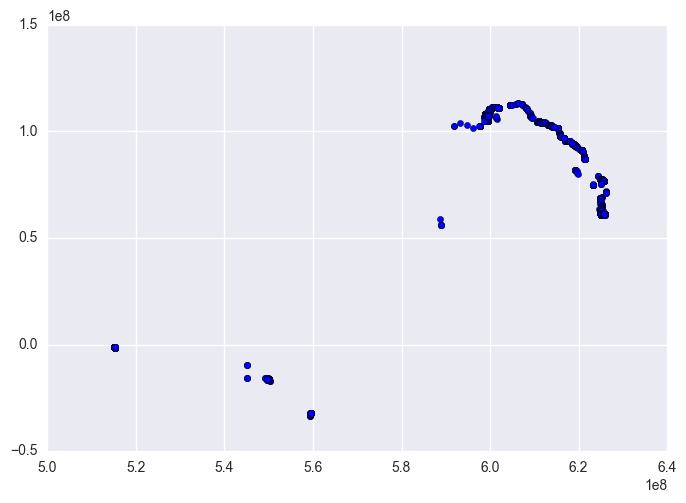

In [5]:
lat  = df[['latitudeE7']]
lon  = df[['longitudeE7']]

scatter(lat,lon)
show()

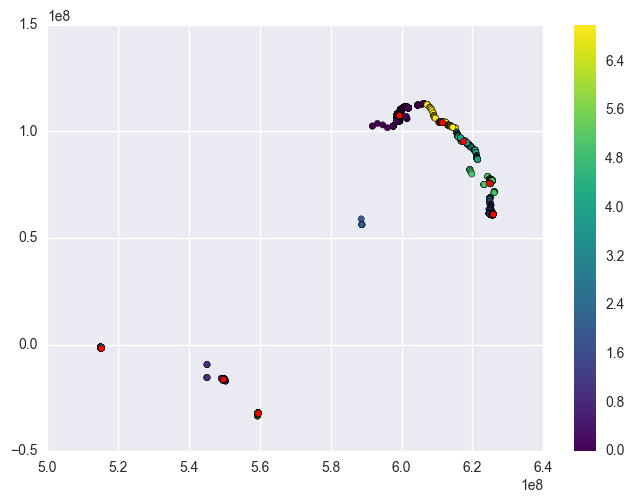

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=100)
kmeans.fit(df[['latitudeE7','longitudeE7']])

pred = kmeans.fit_predict(df[['latitudeE7','longitudeE7']])

cc = kmeans.cluster_centers_
scatter(lat,lon,c=pred,cmap='viridis')

colorbar()
scatter(cc[:,0],cc[:,1],c='r')
show()

In [7]:
from mpl_toolkits.basemap import Basemap

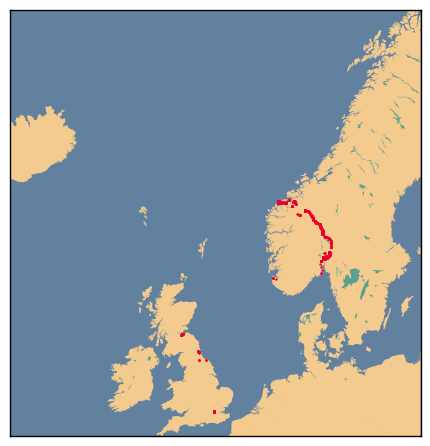

In [46]:
import matplotlib.pyplot as plt

m1 = Basemap(projection='merc',
             llcrnrlat=50,
             urcrnrlat=70,
             llcrnrlon=-20,
             urcrnrlon=20,
             lat_ts=0,
             resolution='i')

m1.fillcontinents(color='#F4CB8F',lake_color='#5D9F8E') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#62819F')                # black background
m1.drawcountries(linewidth=1, color="#F4B58F")              # thin white line for country borders

SCALAR_E7 = 0.0000001

x, y = m1(SCALAR_E7*df.longitudeE7.values,SCALAR_E7*df.latitudeE7.values)
m1.scatter(x,y, s=3, c="#EF002A", lw=0, alpha=1, zorder=5)
plt.show()